In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install scikit-learn imbalanced-learn matplotlib plotly joblib streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.6 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('/content/screentime.csv')

In [4]:
df.shape

(9712, 8)

In [5]:
df.sample(20)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
3931,18,Male,3.44,Smartphone,True,0.41,"Poor Sleep, Anxiety",Urban
3597,9,Female,5.97,Smartphone,True,0.59,Poor Sleep,Urban
4309,8,Female,3.56,Smartphone,True,0.42,Poor Sleep,Urban
2117,15,Female,6.14,Smartphone,True,0.35,Poor Sleep,Urban
9604,16,Female,3.89,Smartphone,True,0.30,NaN,Urban
6417,16,Female,3.41,Laptop,True,0.49,"Poor Sleep, Anxiety",Urban
4694,10,Male,5.06,Smartphone,True,0.55,"Poor Sleep, Eye Strain",Urban
8233,16,Female,2.79,Laptop,False,0.34,NaN,Rural
3868,13,Female,4.88,Smartphone,True,0.50,Poor Sleep,Urban
947,8,Male,1.15,Tablet,False,0.45,NaN,Urban


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [8]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [9]:
df.duplicated().sum()

np.int64(44)

<b><h2>Univariate Analysis for Categorial Data</h2></b>

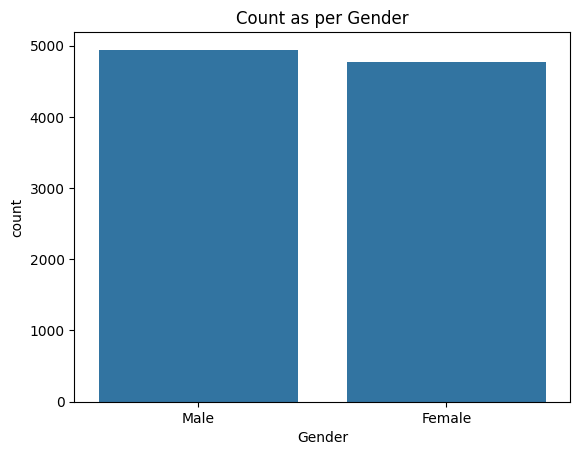

In [10]:
sns.countplot(x='Gender', data=df)
plt.title('Count as per Gender')
plt.show()

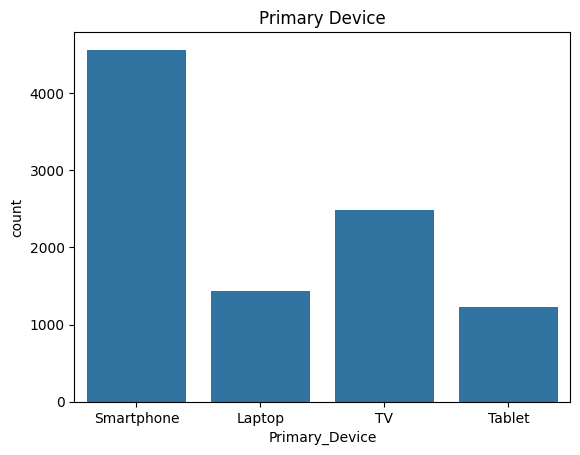

In [11]:
sns.countplot(x='Primary_Device',data=df)
plt.title('Primary Device')
plt.show()

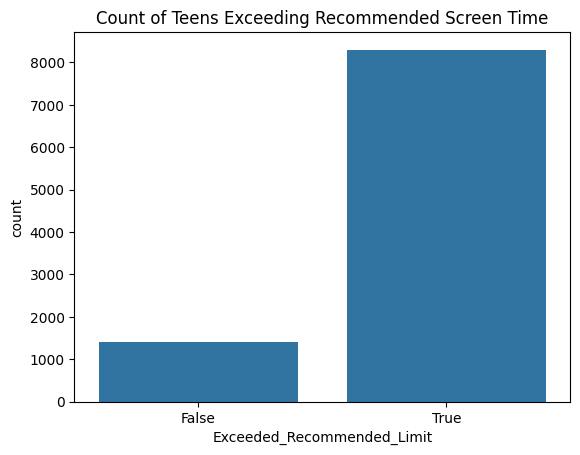

In [12]:
sns.countplot(x='Exceeded_Recommended_Limit', data=df)
plt.title("Count of Teens Exceeding Recommended Screen Time")
plt.show()

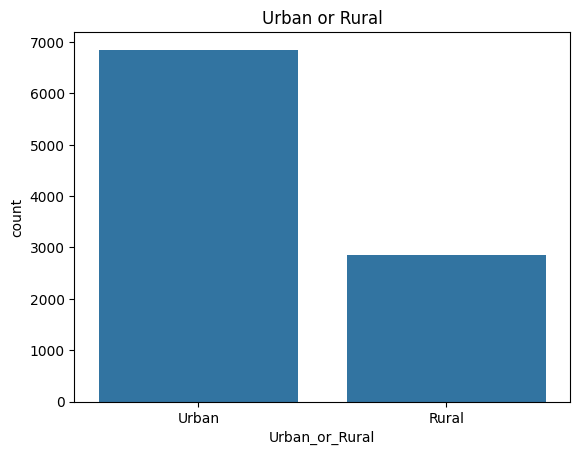

In [13]:
sns.countplot(x='Urban_or_Rural',data=df)
plt.title('Urban or Rural')
plt.show()

<Axes: ylabel='count'>

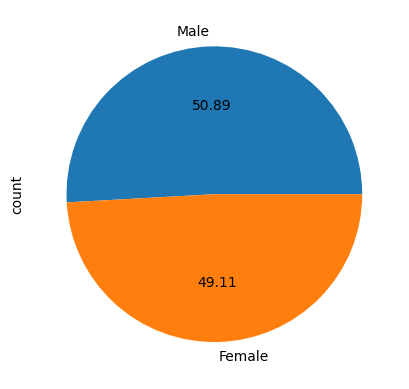

In [14]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

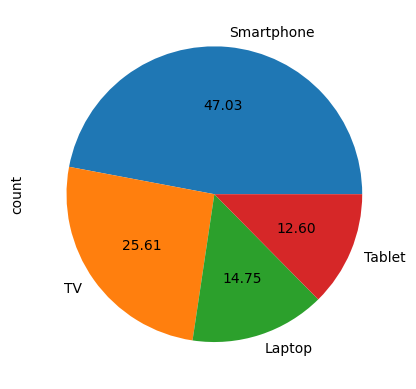

In [15]:
df['Primary_Device'].value_counts().plot(kind='pie',autopct='%.2f')

<b><h2>Univaruate Analysis for Numerical Data</h2></b>

(array([912., 885.,   0., 877., 866.,   0., 867., 910.,   0., 896., 864.,
          0., 876., 919., 840.]),
 array([ 8.        ,  8.66666667,  9.33333333, 10.        , 10.66666667,
        11.33333333, 12.        , 12.66666667, 13.33333333, 14.        ,
        14.66666667, 15.33333333, 16.        , 16.66666667, 17.33333333,
        18.        ]),
 <BarContainer object of 15 artists>)

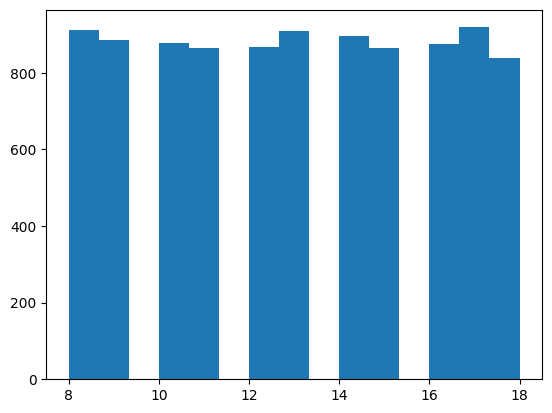

In [16]:
plt.hist(df['Age'],bins=15)

(array([5.440e+02, 9.330e+02, 2.696e+03, 3.437e+03, 1.602e+03, 3.670e+02,
        9.300e+01, 2.600e+01, 1.100e+01, 3.000e+00]),
 array([ 0.   ,  1.389,  2.778,  4.167,  5.556,  6.945,  8.334,  9.723,
        11.112, 12.501, 13.89 ]),
 <BarContainer object of 10 artists>)

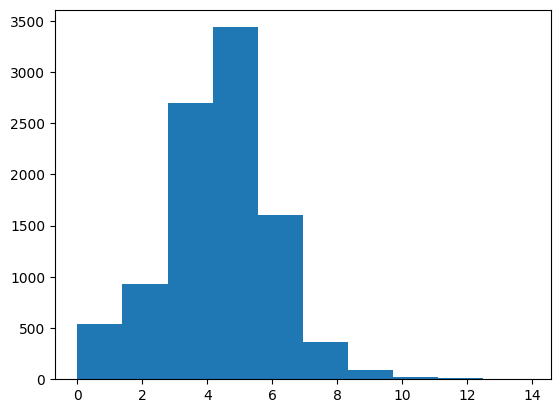

In [17]:
plt.hist(df['Avg_Daily_Screen_Time_hr'])

(array([ 877., 1022., 1118., 1299., 1409., 1498., 1205.,  397.,  540.,
         347.]),
 array([0.3 , 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 ]),
 <BarContainer object of 10 artists>)

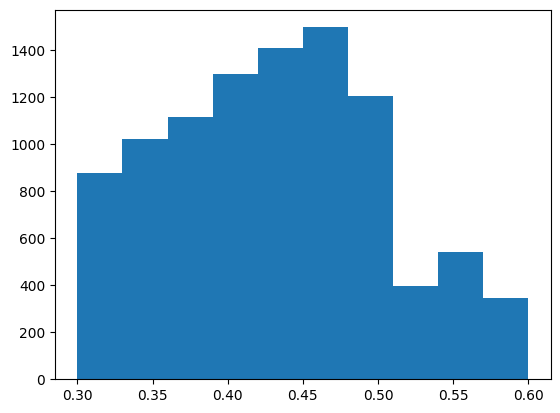

In [18]:
plt.hist(df['Educational_to_Recreational_Ratio'])

<Axes: xlabel='Educational_to_Recreational_Ratio', ylabel='Avg_Daily_Screen_Time_hr'>

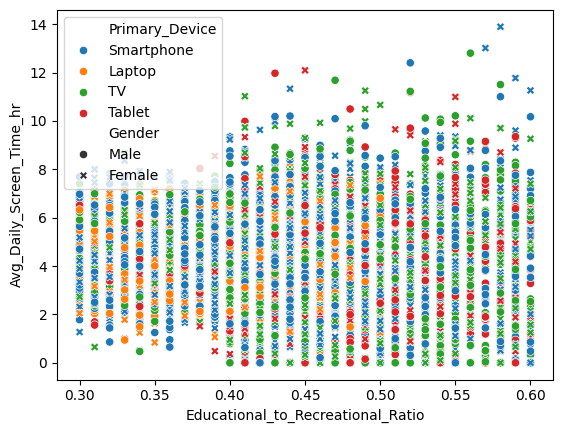

In [19]:
sns.scatterplot( x = 'Educational_to_Recreational_Ratio', y = 'Avg_Daily_Screen_Time_hr', data = df, hue = df['Primary_Device'], style = df['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

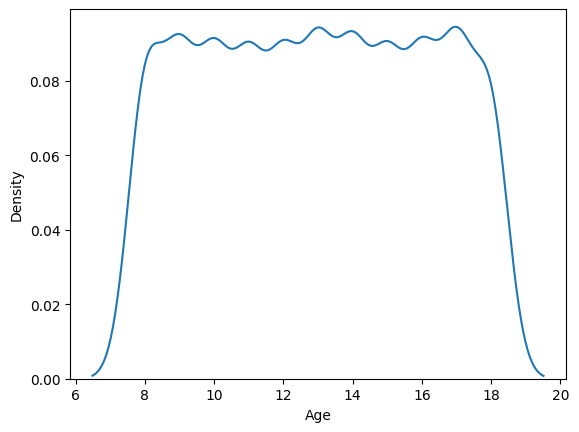

In [32]:
sns.distplot(df['Age'], hist = False)

<Axes: ylabel='Age'>

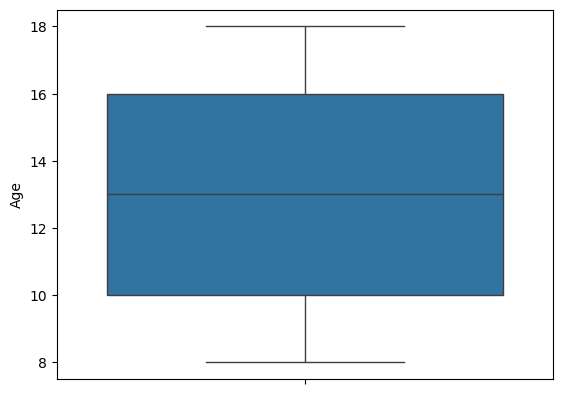

In [21]:
sns.boxplot(df['Age'])

<Axes: ylabel='Avg_Daily_Screen_Time_hr'>

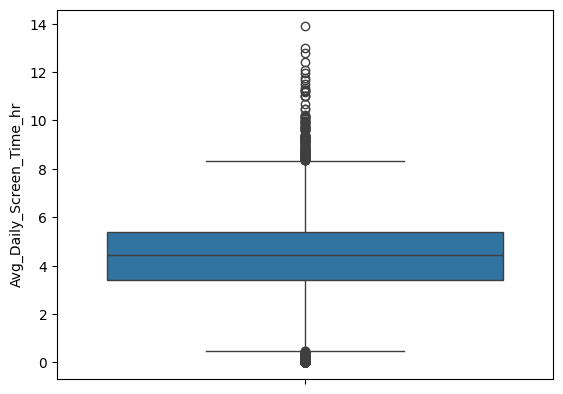

In [22]:
sns.boxplot(df['Avg_Daily_Screen_Time_hr'])

<Axes: ylabel='Educational_to_Recreational_Ratio'>

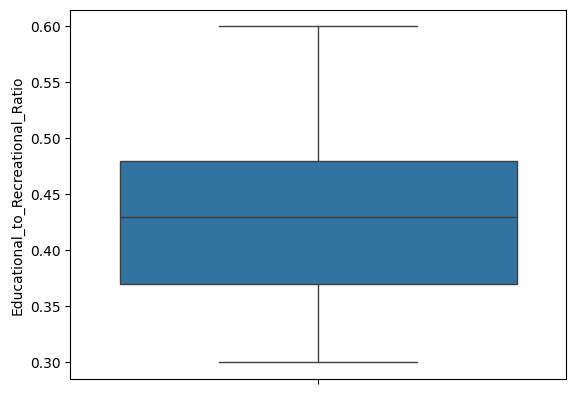

In [23]:
sns.boxplot(df['Educational_to_Recreational_Ratio'])

**Few Multivariate Analysis methods in EDA, because why not, do it for sake of learning.**

<Axes: xlabel='Exceeded_Recommended_Limit', ylabel='Urban_or_Rural'>

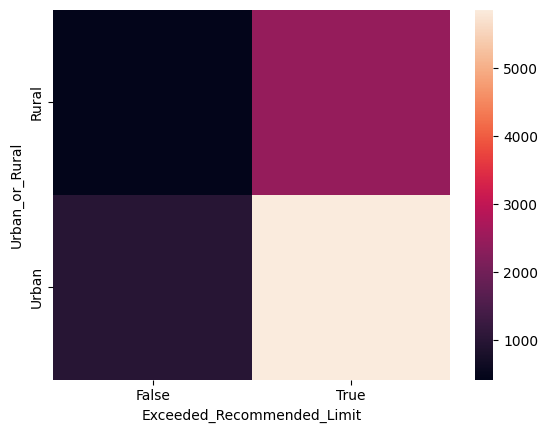

In [34]:
sns.heatmap(pd.crosstab(df['Urban_or_Rural'],df['Exceeded_Recommended_Limit']))

<Axes: xlabel='Gender'>

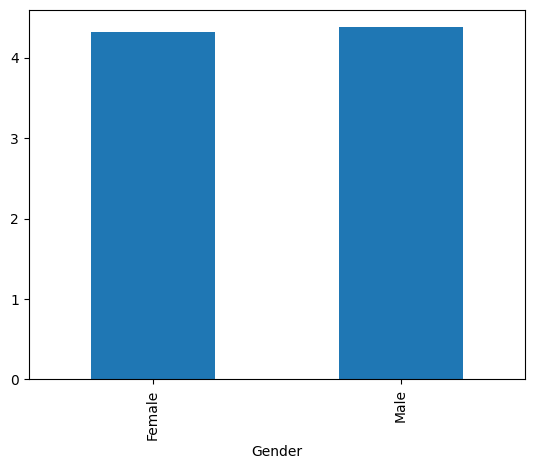

In [39]:
df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].mean().plot(kind='bar')

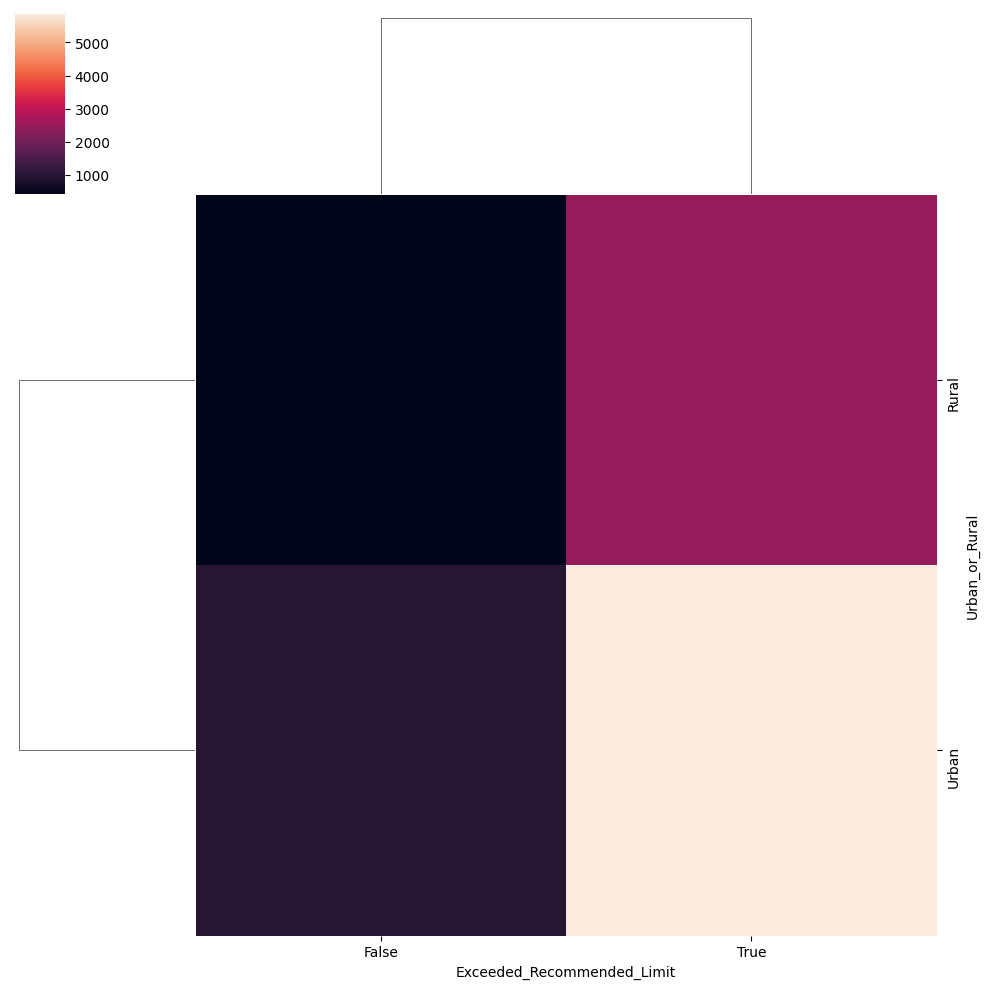

In [42]:
sns.clustermap(pd.crosstab(df['Urban_or_Rural'],df['Exceeded_Recommended_Limit']))

The above map doesn't signify anthing specific, but doing it to find how does it look


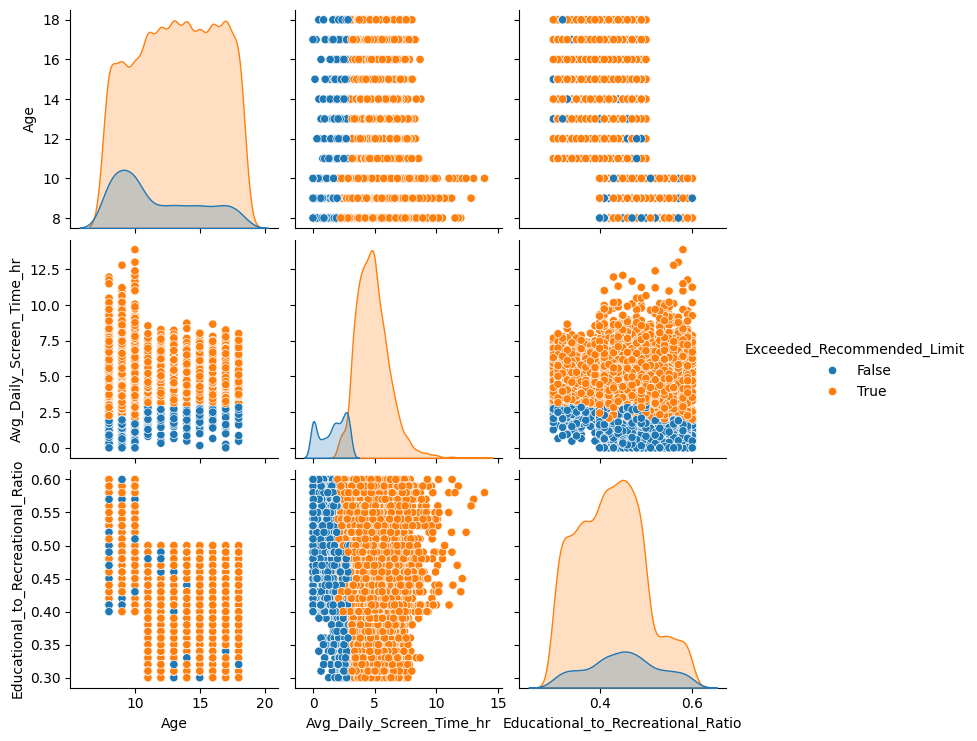

In [45]:
sns.pairplot(df,hue='Exceeded_Recommended_Limit')

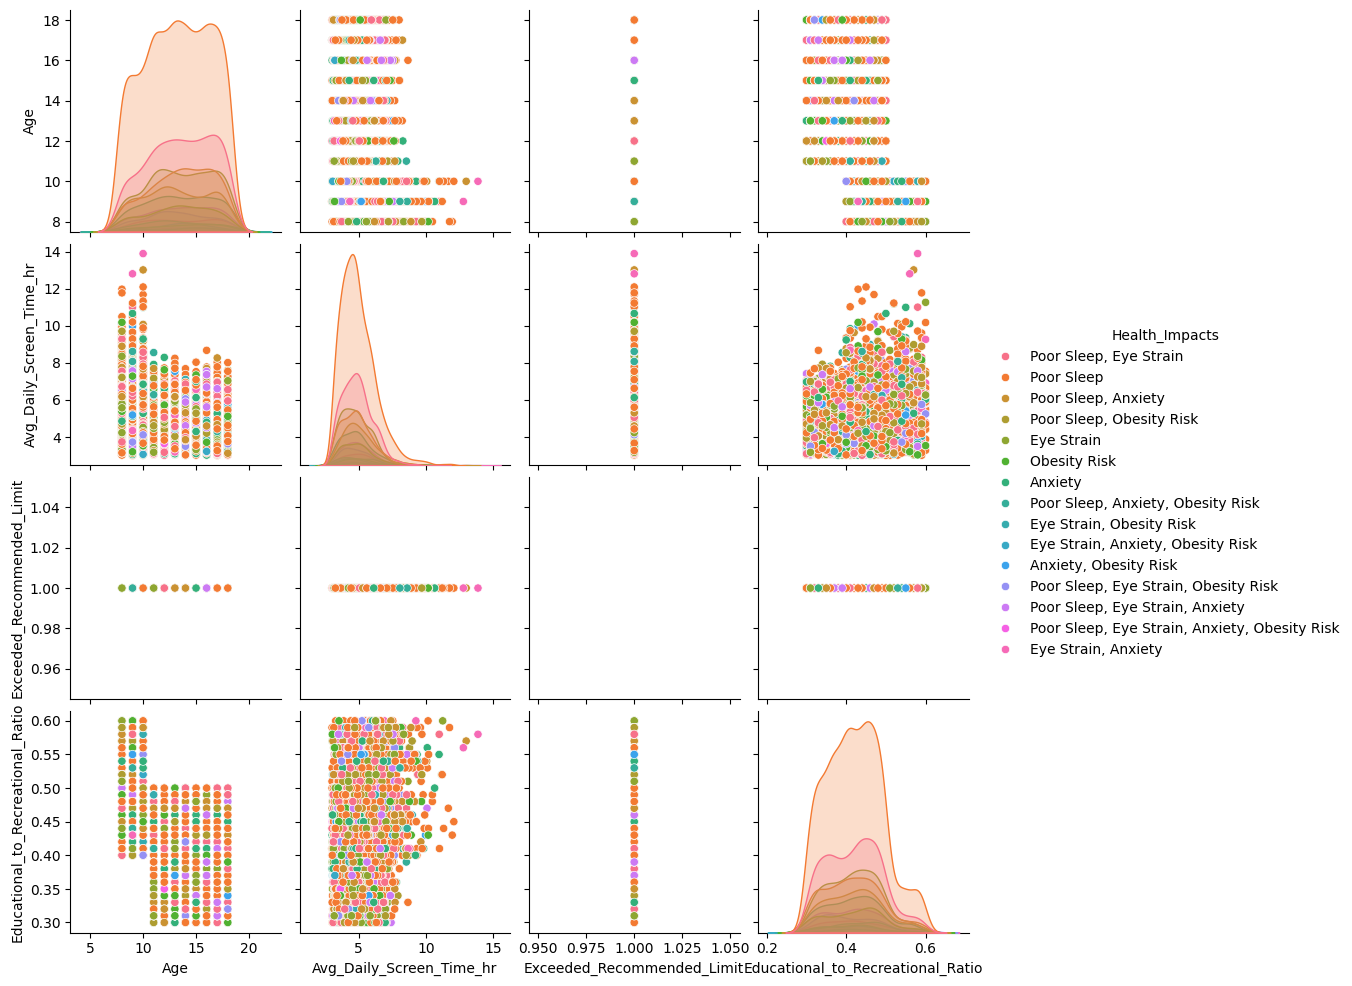

In [46]:
sns.pairplot(df,hue='Health_Impacts')